In [1]:
from hublib.tool import get_inputs, run_simtool, rdisplay, read, get_outputs_df, get_outputs, get_output_files

In [2]:
nb = '/apps/simtools/melting_KIM.ipynb'
#nb = 'melting_KIM.ipynb'
inputs = get_inputs(nb)
inputs

material:
    type: Text
    value: Ni
    maxlen: 2
    options: ['Ni', 'Al', 'Fe', 'Co', 'Ti', 'W']

crystal_structure:
    type: Text
    value: fcc
    options: ['fcc', 'bcc', 'hcp']

lattice_parameter:
    type: Number
    value: 3.5203
    min: 3
    max: 5.5
    units: angstrom

mass:
    type: Element
    property: atomic_weight
    value: 58.6934

Tsolid:
    type: Number
    value: 500
    min: 1
    max: 4000
    units: kelvin

Tliquid:
    type: Number
    value: 2000
    min: 1
    max: 4000
    units: kelvin

kim_model_name:
    type: Text
    value: EAM_Dynamo_PurjaPun_Mishin_NiAl__MO_751354403791_004

In [3]:
# we can get a list of expected outputs
get_outputs(nb)

final_snapshot:
    desc: JPG of final structure
    type: Image
    value: None

melting_temperature:
    desc: The melting temperature
    type: Number
    units: kelvin
    value: None

LAMMPS_log:
    desc: Lammps log file
    type: Text
    value: None

time_series:
    desc: 'Time'
    type: 'Array'
    units: 'ps'
    value: None

temperature_series:
    desc: 'Temperature'
    type: 'Array'
    units: 'K'
    value: None

potential_energy_series:
    type: 'Array'
    units: 'eV'
    value: None

volume_series:
    type: 'Array'
    units: 'angstrom^3'
    value: None

In [4]:
# unit conversion
inputs.Tsolid.value = '1000 C'
inputs.Tsolid.value

1273.15

In [5]:
# range checking
inputs.Tsolid.value = '5000 C'

ValueError: Maximum value is 4000

In [6]:
inputs.Tsolid.value

1273.15

In [7]:
inputs.mass.value

58.6934

In [8]:
# Element type conversion
inputs.mass.value = 'Al'
inputs.mass.value

26.9815385

In [9]:
inputs.mass.value = 58.6934
inputs

material:
    type: Text
    value: Ni
    maxlen: 2
    options: ['Ni', 'Al', 'Fe', 'Co', 'Ti', 'W']

crystal_structure:
    type: Text
    value: fcc
    options: ['fcc', 'bcc', 'hcp']

lattice_parameter:
    type: Number
    value: 3.5203
    min: 3
    max: 5.5
    units: angstrom

mass:
    type: Element
    property: atomic_weight
    value: 58.6934

Tsolid:
    type: Number
    value: 1273.15
    min: 1
    max: 4000
    units: kelvin

Tliquid:
    type: Number
    value: 2000
    min: 1
    max: 4000
    units: kelvin

kim_model_name:
    type: Text
    value: EAM_Dynamo_PurjaPun_Mishin_NiAl__MO_751354403791_004

In [10]:
# run the SimTool with the input values
run_simtool(nb, 'Run0.ipynb', inputs, outdir='RUNS', append=False)

# if we want, do more runs for comparison, each with different values
#inputs.Tsolid.value = 800
#run_simtool(nb, 'Run1.ipynb', inputs, outdir='RUNS', append=True)
#inputs.Tsolid.value = 1000
#run_simtool(nb, 'Run2.ipynb', inputs, outdir='RUNS', append=True)

In [11]:
# We can get a dataframe of output values
get_outputs_df('RUNS/Run0.ipynb')

,value
name,
LAMMPS_log,LAMMPS (22 Aug 2018)\n\n #LAMMPS input file...
final_snapshot,{'image/jpeg': '/9j/4AAQSkZJRgABAQEASABIAAD/2w...
melting_temperature,1771
potential_energy_series,"[-20505.598, -20505.598, -19983.214, -19880.05..."
temperature_series,"[0.0, 0.0, 844.11464, 857.81207, 1043.0469, 11..."
time_series,"[0.0, 1.0, 100.0, 200.0, 300.0, 400.0, 500.0, ..."
volume_series,"[50256.415, 50256.415, 51911.378, 51752.878, 5..."


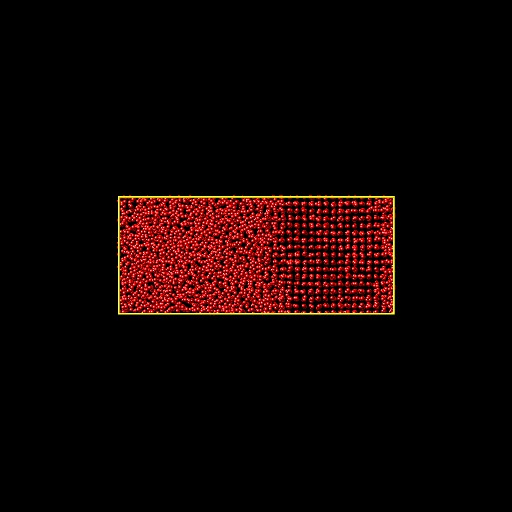

In [12]:
# get a list of notebooks in the RUN directory
nbs = get_output_files('RUNS')

# display the final image from each run
for nb in nbs:
    rdisplay(nb, 'final_snapshot')

In [13]:
for nb in nbs:
    print("%s: Melting Temperature is %s" % (nb.filename, read(nb, 'melting_temperature')))

Run0.ipynb: Melting Temperature is 1770.9998188741722


In [17]:
import plotly.graph_objs as go
for nb in nbs:
    time = read(nb, 'time_series')
    temp = read(nb, 'temperature_series')
    p = go.FigureWidget()
    p.add_scatter(x=time, y=temp)
    p.layout = {'title': nb.filename}
    p.layout.xaxis = {'title': 'Time (picoseconds)'}
    p.layout.yaxis = {'title': 'Temperature (K)'}
    display(p)

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': 'ac0647b6-f504-4195-8b76-1ba3e076db91',
 …